![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

In [2]:
# Start coding here
# Use as many cells as you need
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour = crimes["HOUR OCC"].value_counts().idxmax()
peak_night_crime_location = crimes[crimes["TIME OCC"].str[:2].isin(["22", "23", "00", "01", "02", "03"])].groupby("AREA NAME").size().sort_values(ascending=False).idxmax()
print(crimes["Vict Age"].max())
Age_Bins = [0, 18, 26, 35, 45, 55, 65, np.inf]
Age_Labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=Age_Bins, labels=Age_Labels, right=False)
victim_ages = crimes["Age Group"].value_counts().sort_index()
print(victim_ages)

99
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64


**Crimes by Hour of the Day**

This chart helps identify peak hours of criminal activity, assisting in time-based resource allocation.

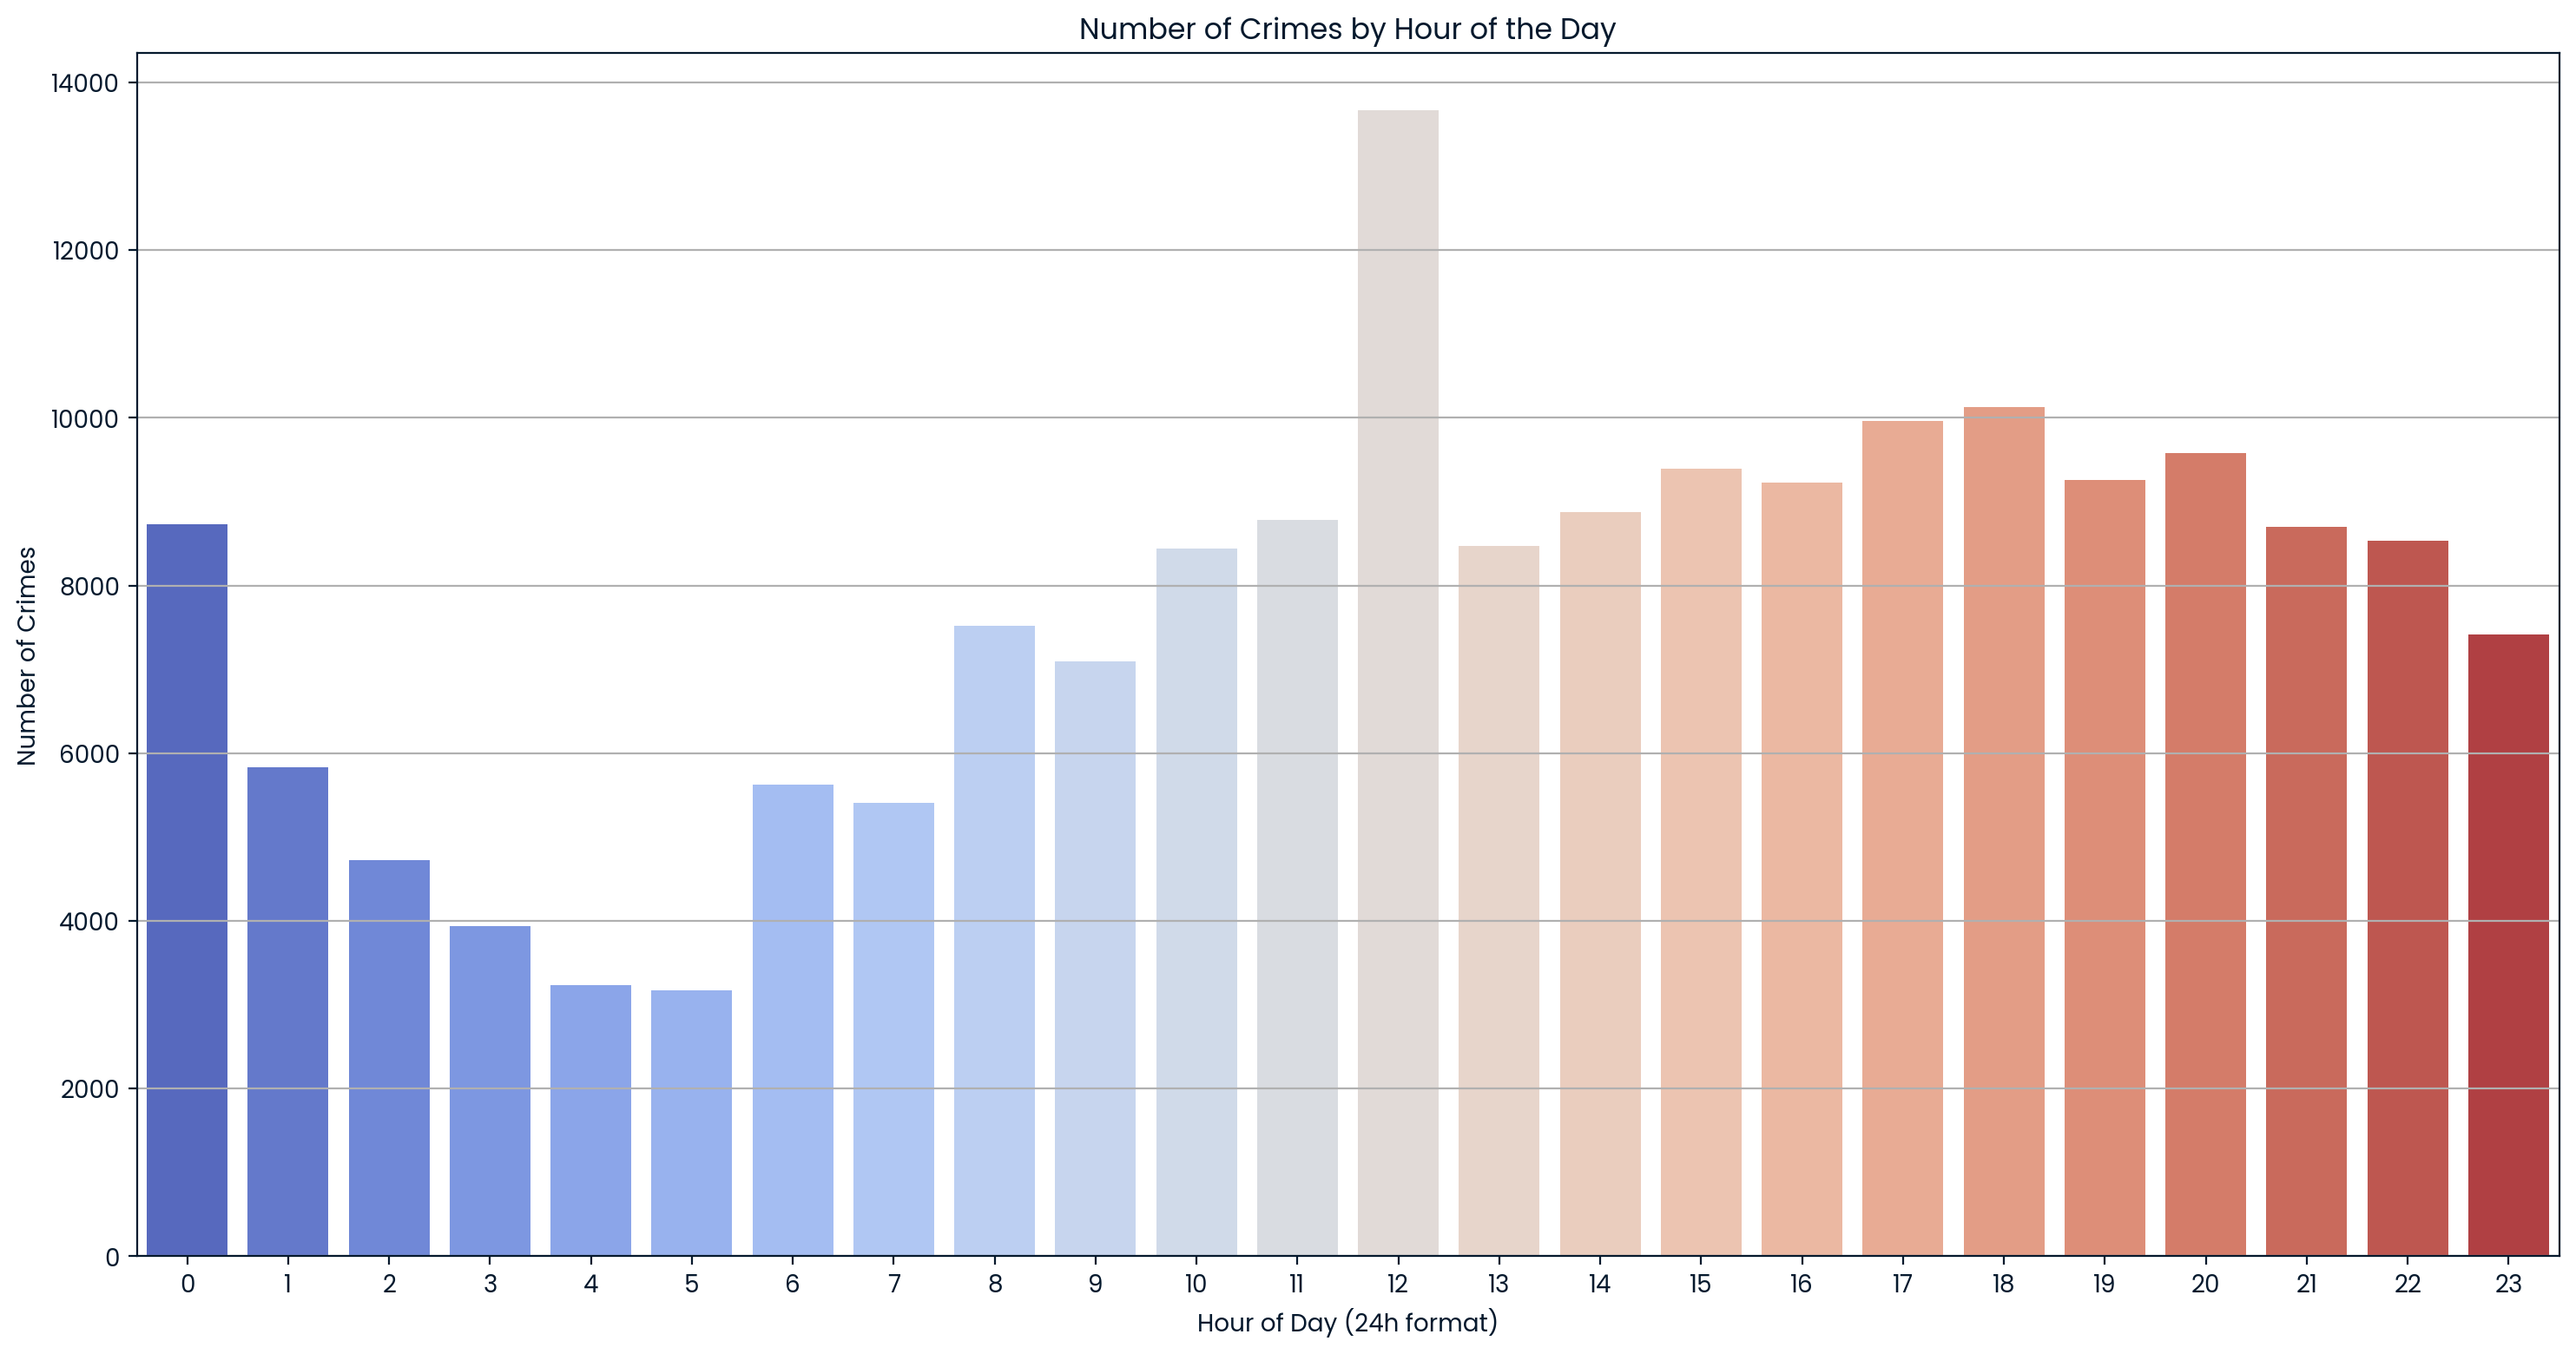

In [8]:
plt.figure(figsize=(18,9))
sns.countplot(data=crimes, x="HOUR OCC", palette="coolwarm")
plt.title("Number of Crimes by Hour of the Day")
plt.xlabel("Hour of Day (24h format)")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


**Victim Age Group Distribution**

This shows which age groups are most frequently targeted, which can guide community support strategies.

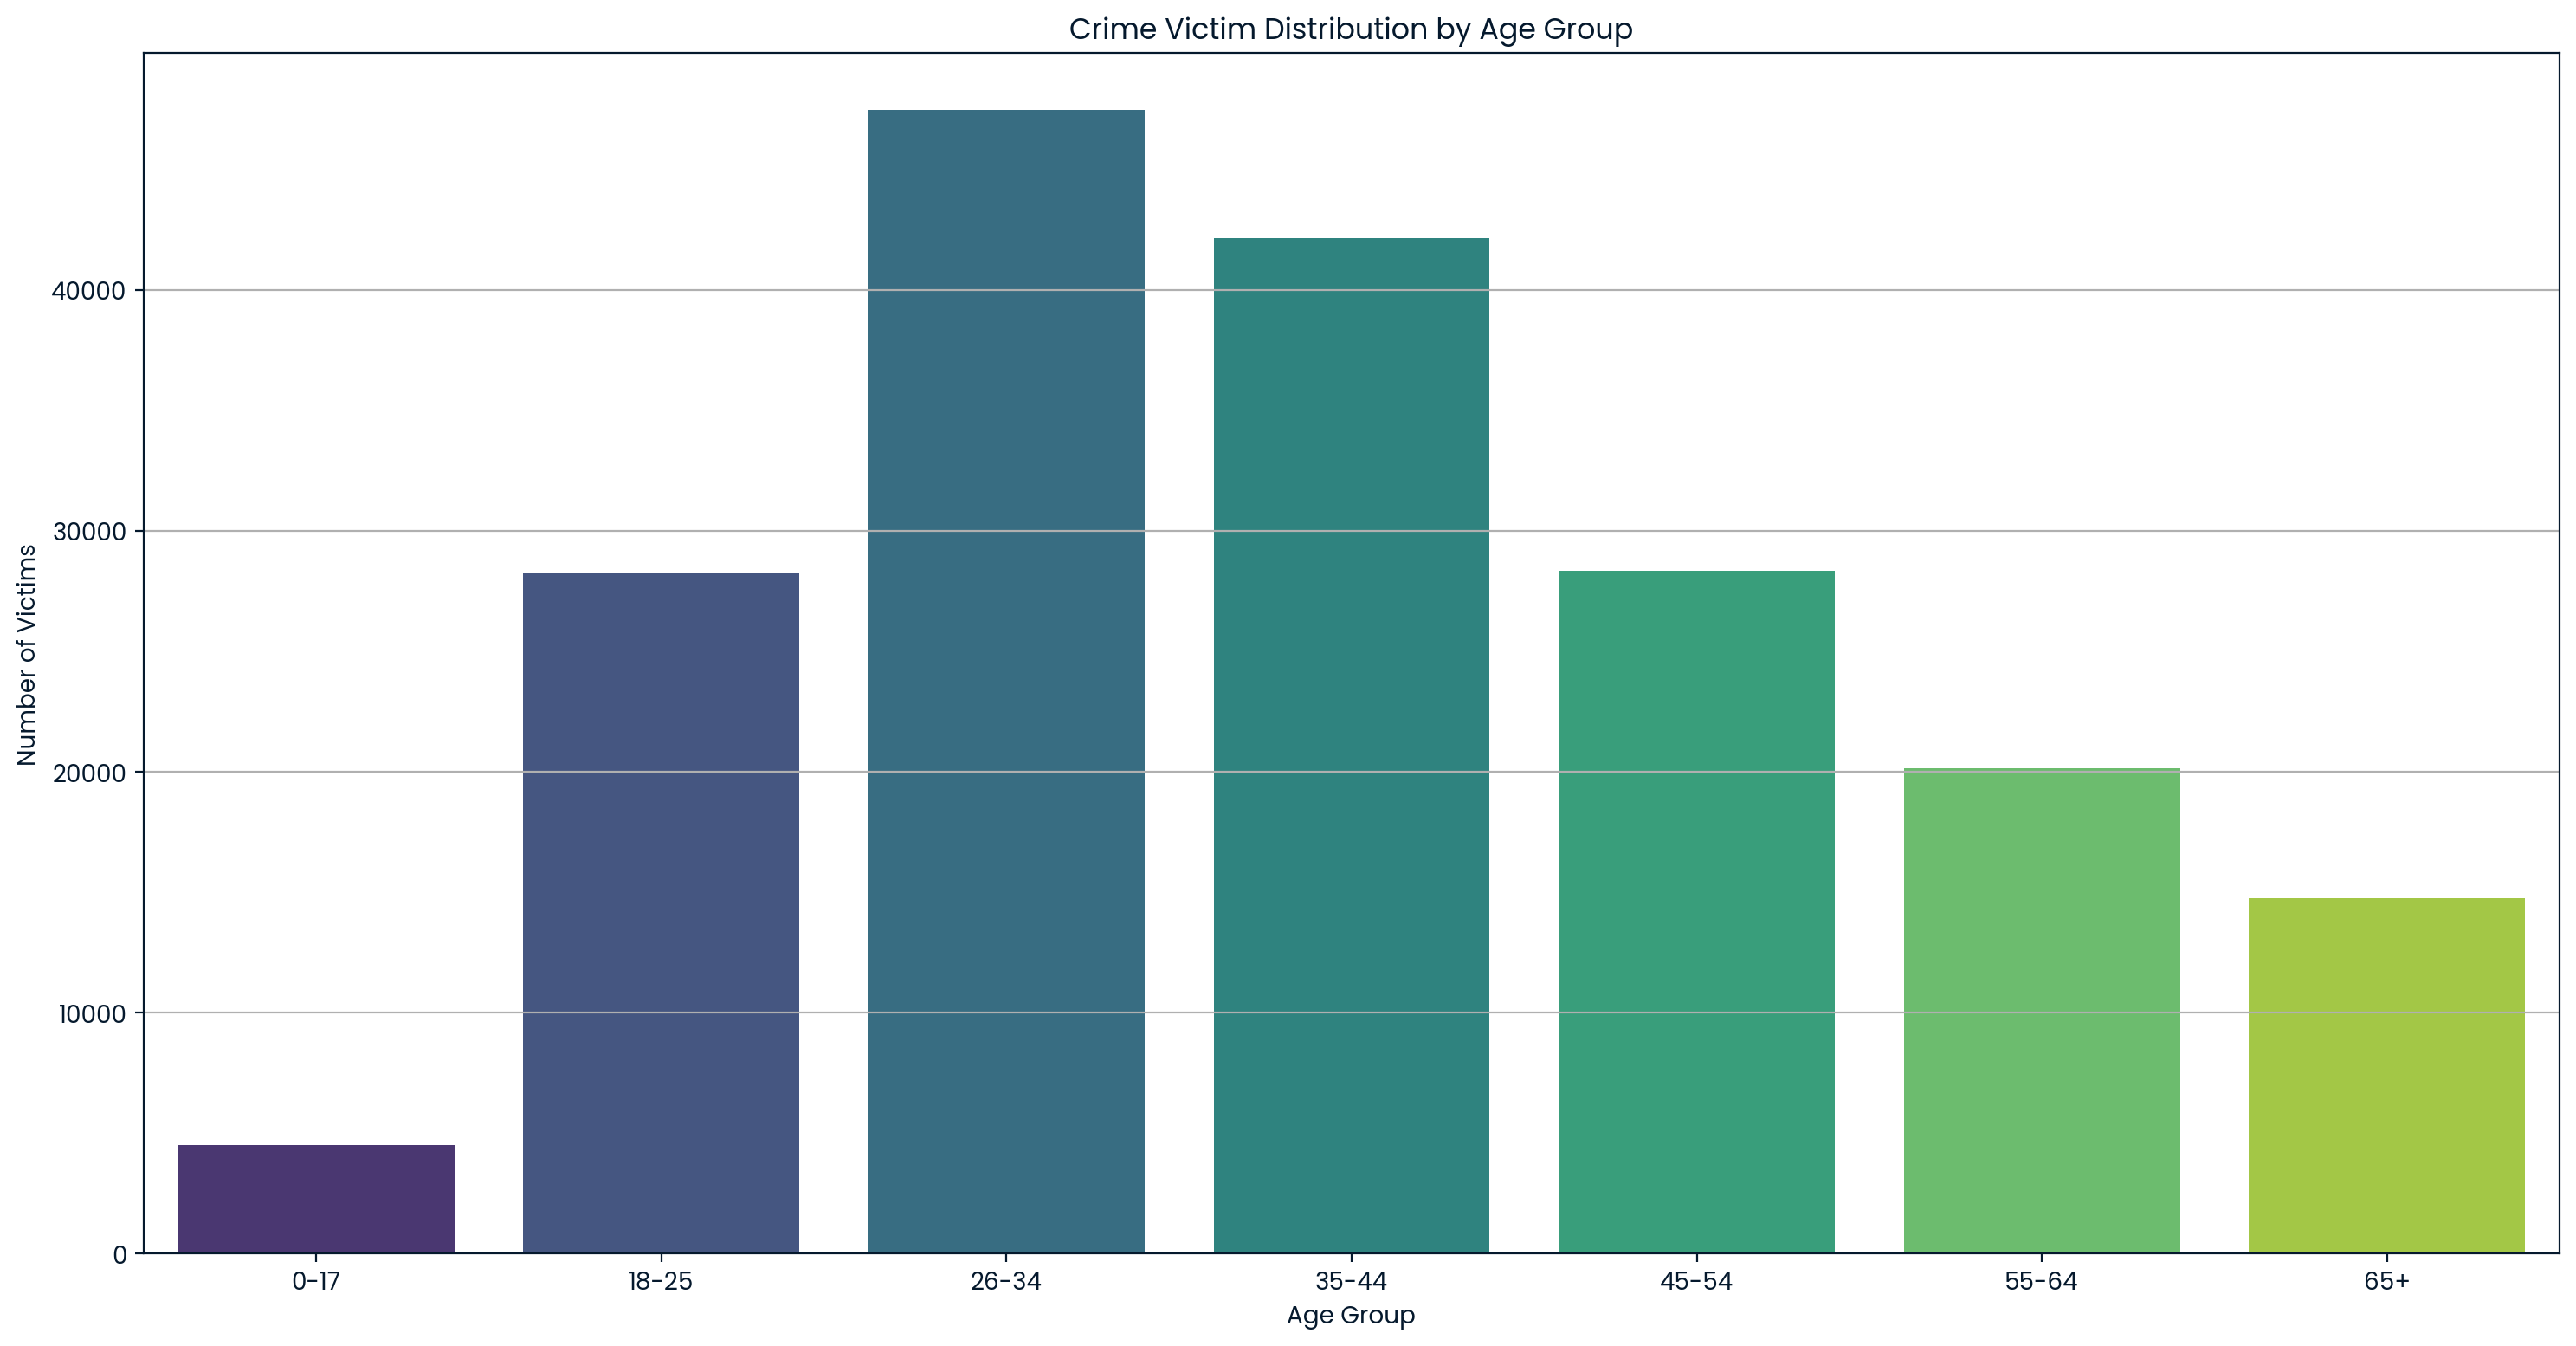

In [7]:
plt.figure(figsize=(18,9))
sns.barplot(x=victim_ages.index, y=victim_ages.values, palette="viridis")
plt.title("Crime Victim Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Victims")
plt.grid(axis='y')
plt.show()


**Top 10 Crime Locations at Night (10 PM – 3 AM)**

Highlights specific patrol divisions most active at night to help LAPD prioritize nighttime patrolling.

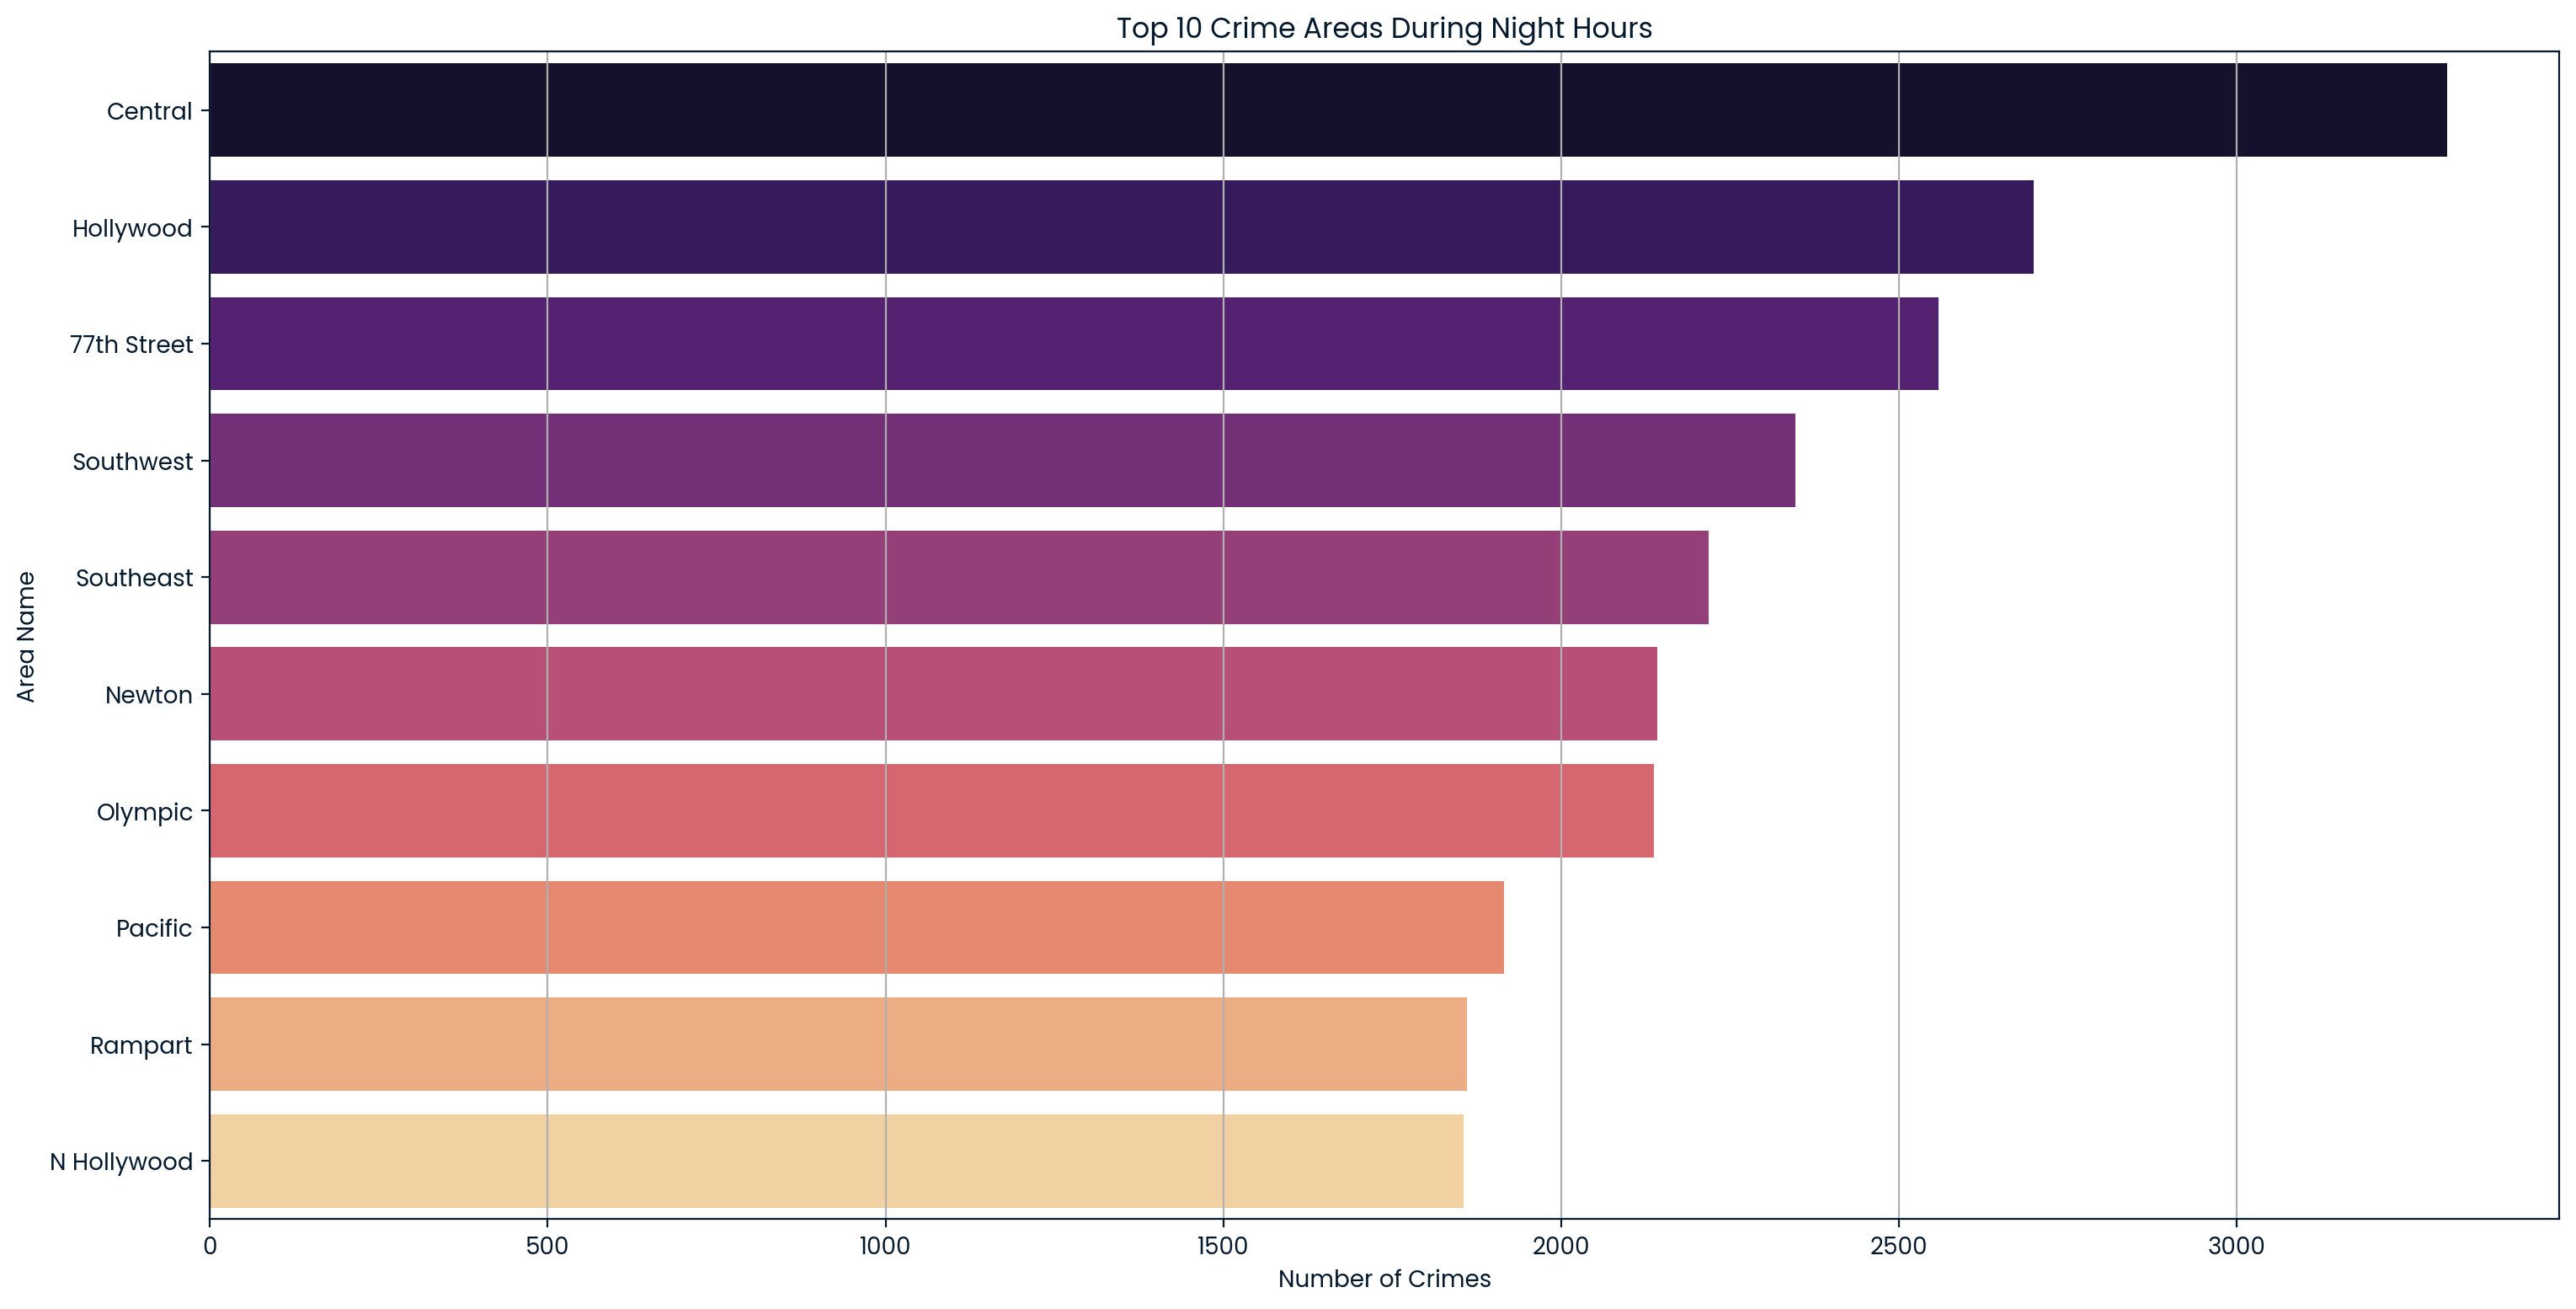

In [6]:
night_hours = ["22", "23", "00", "01", "02", "03"]
night_crimes = crimes[crimes["TIME OCC"].str[:2].isin(night_hours)]
top_night_areas = night_crimes["AREA NAME"].value_counts().head(10)

plt.figure(figsize=(18,9))
sns.barplot(x=top_night_areas.values, y=top_night_areas.index, palette="magma")
plt.title("Top 10 Crime Areas During Night Hours")
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.grid(axis='x')
plt.show()
